In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.linear_model import LinearRegression

In [83]:
car_df = pd.read_csv("../Resources/Data Sources/reduced_auto_df.csv")



# bed = car_df["BedLengthIN"]

# bed

# for b in range(len(bed)):
#     if not ("NaN") in bed:
#         print("not nan")
top = car_df.sort_values(by=['Selling_Price'], ascending= False).head(10)   

In [132]:
model = car_df["Make"].unique()

model_df = pd.DataFrame(model)
model_df
# for m in range(len(model_df)):
#      print(m)



,0
0,FORD
1,RAM
2,DODGE
3,CHRYSLER
4,LINCOLN
5,JEEP
6,NISSAN
7,CHEVROLET
8,ALFA ROMEO
9,ACURA


In [85]:
print("original dataframe:")
car_df

original dataframe:


,MSRP,Selling_Price,Mileage,Cruise_Control,AutoReverseSystem,PedestrianAlertingSound,Axles,BasePrice,BedLengthIN,BedType,...,ForwardCollisionWarning,KeylessIgnition,Make,Model,ModelYear,PedAutoEBrake,TopSpeedMPH,TransmissionSpeeds,TransmissionStyle,VehicleType
0,41659,41659,0,NaN,Standard,NaN,2.0,NaN,NaN,NaN,...,Standard,NaN,FORD,F-150,2019.0,Standard,NaN,NaN,Automatic,TRUCK
1,47174,47174,0,NaN,Standard,NaN,2.0,NaN,NaN,NaN,...,Standard,NaN,FORD,F-150,2019.0,Standard,NaN,NaN,Automatic,TRUCK
2,12568,12568,0,NaN,Standard,Standard,2.0,15490.0,NaN,NaN,...,NaN,NaN,FORD,Fiesta,2019.0,NaN,130.0,NaN,NaN,PASSENGER CAR
3,12568,12568,0,NaN,Standard,Standard,2.0,15490.0,NaN,NaN,...,NaN,NaN,FORD,Fiesta,2019.0,NaN,130.0,NaN,NaN,PASSENGER CAR
4,19514,19514,0,NaN,Standard,NaN,2.0,24120.0,NaN,NaN,...,Standard,Standard,FORD,Fusion,2019.0,Standard,155.0,NaN,NaN,PASSENGER CAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157397,21291,21291,0,Standard,Standard,NaN,2.0,21150.0,NaN,NaN,...,Standard,Standard,HONDA,Civic,2019.0,NaN,NaN,NaN,Continuously Variable Transmission (CVT),PASSENGER CAR
157398,21316,21316,0,Standard,Standard,NaN,2.0,21150.0,NaN,NaN,...,Standard,Standard,HONDA,Civic,2019.0,NaN,NaN,NaN,Continuously Variable Transmission (CVT),PASSENGER CAR
157399,28467,28467,0,Standard,Standard,NaN,2.0,30120.0,NaN,NaN,...,Standard,Standard,HONDA,Accord,2019.0,NaN,155.0,NaN,Continuously Variable Transmission (CVT),PASSENGER CAR
157400,19368,19368,0,Standard,Standard,Standard,2.0,18160.0,NaN,NaN,...,Standard,Standard,HONDA,Fit,2019.0,NaN,115.0,NaN,Continuously Variable Transmission (CVT),PASSENGER CAR


In [86]:
# call groupby method.
group_make =car_df.sort_values("Make", ascending=False).groupby("Make",as_index=False).mean()
group_make

,Make,MSRP,Selling_Price,Mileage,Axles,BasePrice,BedLengthIN,Doors,EngineHP,ModelYear,TopSpeedMPH,TransmissionSpeeds
0,ACURA,34957.689679,34927.660971,0.118934,2.0,38457.502800,NaN,3.987697,243.871497,2019.215995,133.842324,8.450444
1,ALFA ROMEO,53716.861290,48536.048387,4.264516,2.0,53137.638889,NaN,3.948387,294.858065,2018.600000,NaN,7.777778
2,AUDI,52025.237891,51332.781924,2.543593,2.0,53951.951307,NaN,3.691813,295.094803,2018.636394,136.621191,7.233503
3,BMW,67343.819187,66715.371612,2.352710,2.0,52741.519903,NaN,3.505124,328.976940,2019.124465,145.741197,7.862028
4,BUICK,38721.107794,32871.507463,0.182421,2.0,34301.403509,NaN,3.754561,NaN,2018.575456,137.375000,7.863636
5,CADILLAC,64483.612335,61570.925110,0.013216,2.0,60013.390805,NaN,3.913876,NaN,2018.854626,156.195652,7.547170
6,CHEVROLET,40050.725599,34851.642500,0.095444,2.0,33104.438108,NaN,3.820913,175.071109,2018.814915,129.357249,6.583297
7,CHRYSLER,32344.352740,28396.571918,0.397260,2.0,32962.929448,NaN,4.000000,296.619863,2018.616438,155.000000,8.000000
8,DODGE,34711.876543,31893.277778,0.600190,2.0,35312.091661,NaN,2.891738,365.045058,2018.647198,NaN,7.640167
9,FIAT,24487.005236,23576.240838,1.623037,2.0,18043.695652,NaN,2.000000,140.973451,2018.298429,NaN,6.000000


In [88]:
group_make

,Make,MSRP,Selling_Price,Mileage,Axles,BasePrice,BedLengthIN,Doors,EngineHP,ModelYear,TopSpeedMPH,TransmissionSpeeds
0,ACURA,34957.689679,34927.660971,0.118934,2.0,38457.502800,NaN,3.987697,243.871497,2019.215995,133.842324,8.450444
1,ALFA ROMEO,53716.861290,48536.048387,4.264516,2.0,53137.638889,NaN,3.948387,294.858065,2018.600000,NaN,7.777778
2,AUDI,52025.237891,51332.781924,2.543593,2.0,53951.951307,NaN,3.691813,295.094803,2018.636394,136.621191,7.233503
3,BMW,67343.819187,66715.371612,2.352710,2.0,52741.519903,NaN,3.505124,328.976940,2019.124465,145.741197,7.862028
4,BUICK,38721.107794,32871.507463,0.182421,2.0,34301.403509,NaN,3.754561,NaN,2018.575456,137.375000,7.863636
5,CADILLAC,64483.612335,61570.925110,0.013216,2.0,60013.390805,NaN,3.913876,NaN,2018.854626,156.195652,7.547170
6,CHEVROLET,40050.725599,34851.642500,0.095444,2.0,33104.438108,NaN,3.820913,175.071109,2018.814915,129.357249,6.583297
7,CHRYSLER,32344.352740,28396.571918,0.397260,2.0,32962.929448,NaN,4.000000,296.619863,2018.616438,155.000000,8.000000
8,DODGE,34711.876543,31893.277778,0.600190,2.0,35312.091661,NaN,2.891738,365.045058,2018.647198,NaN,7.640167
9,FIAT,24487.005236,23576.240838,1.623037,2.0,18043.695652,NaN,2.000000,140.973451,2018.298429,NaN,6.000000


In [89]:
df

,Selling_Price,Make,MSRP,Mileage,Axles,BasePrice,BedLengthIN,Doors,EngineHP,ModelYear,TopSpeedMPH,TransmissionSpeeds
0,16149.873134,MITSUBISHI,16628.895522,0.000000,2.0,13969.712644,NaN,4.447761,NaN,2018.365672,105.000000,NaN
1,18590.169198,HYUNDAI,20226.877716,0.145164,2.0,20393.363520,NaN,4.046850,158.991004,2018.898481,NaN,6.000000
2,22810.957816,NISSAN,24983.467370,0.308046,2.0,23066.319846,NaN,3.996832,127.785970,2018.844872,119.045994,NaN
3,23366.984419,MAZDA,24264.376771,4.555241,2.0,24126.045894,NaN,4.134561,186.019830,2018.412181,NaN,6.000000
4,23576.240838,FIAT,24487.005236,1.623037,2.0,18043.695652,NaN,2.000000,140.973451,2018.298429,NaN,6.000000
5,24224.949976,HONDA,24898.920619,0.350715,2.0,26021.537076,64.000000,4.085695,183.113992,2018.877643,144.943148,7.515060
6,24382.596851,VOLKSWAGEN,25906.122519,0.327515,2.0,26587.939573,NaN,3.790666,169.069815,2018.877139,133.105965,7.029090
7,24633.551079,KIA,26140.831655,0.330216,2.0,21758.524429,NaN,4.143885,186.533813,2019.040647,120.656566,6.181492
8,26338.871949,TOYOTA,27286.780155,0.844148,2.0,24645.037120,67.949458,4.187272,197.464604,2019.065339,120.493752,6.768369
9,26964.936801,SUBARU,27461.961899,0.000000,2.0,24429.589638,NaN,4.299365,184.561873,2019.055942,139.736842,5.884615


In [90]:
#group_make = car_df.groupby("Make", as_index = False).mean()
# group_make
group_make = car_df.sort_values("Selling_Price", ascending=False).groupby("Make", as_index=False).mean()


In [91]:
df = group_make.groupby("Selling_Price", as_index=False).max()

## Bar Charts

           Max selling price per make


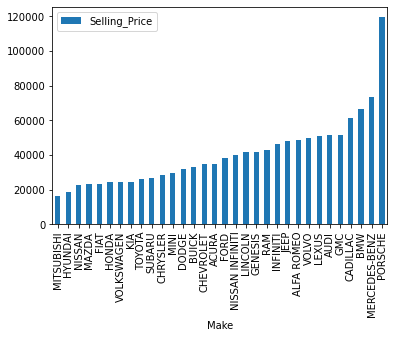

In [92]:
ax = df.plot.bar(x='Make', y='Selling_Price', rot=90)
print("           Max selling price per make")

           Max MSRP price per make


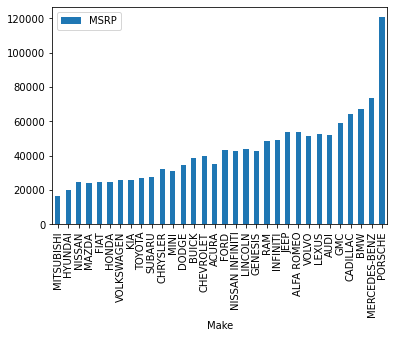

In [93]:
ax = df.plot.bar(x='Make', y='MSRP', rot=90)
print("           Max MSRP price per make")

           Average selling price per make


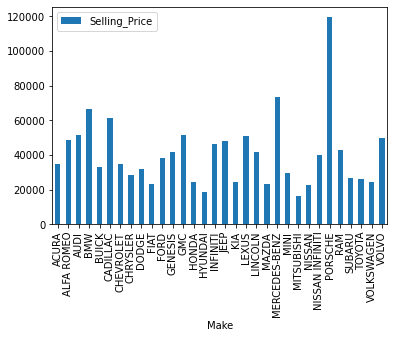

In [94]:
ax = group_make.plot.bar(x='Make', y='Selling_Price', rot=90)
print("           Average selling price per make")

           Average MSRP price per make


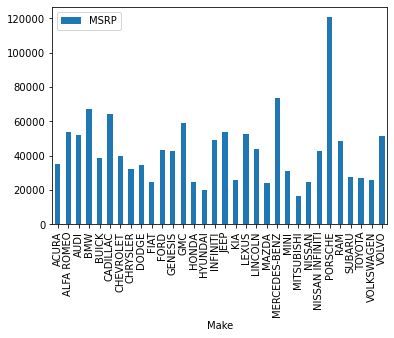

In [95]:
ax = group_make.plot.bar(x='Make', y='MSRP', rot=90)
print("           Average MSRP price per make")

In [119]:
car_stats = car_df.describe().round(2)

#car_stats

In [133]:
top_ten_selling = car_df.nlargest(10, ['Selling_Price'])
# mean_seven = top_ten_selling.groupby(by=["MSRP"], as_index = False).mean()
top_ten_msrp = car_df.nlargest(10, ['MSRP'])

# mean_seven

top_ten_selling 



,MSRP,Selling_Price,Mileage,Cruise_Control,AutoReverseSystem,PedestrianAlertingSound,Axles,BasePrice,BedLengthIN,BedType,...,ForwardCollisionWarning,KeylessIgnition,Make,Model,ModelYear,PedAutoEBrake,TopSpeedMPH,TransmissionSpeeds,TransmissionStyle,VehicleType
37722,5877140,5877140,0,NaN,Standard,NaN,2.0,57240.0,NaN,NaN,...,NaN,Standard,FORD,Mustang,2018.0,NaN,NaN,NaN,NaN,PASSENGER CAR
38998,5877140,5877140,0,NaN,Standard,NaN,2.0,57240.0,NaN,NaN,...,NaN,Standard,FORD,Mustang,2018.0,NaN,NaN,NaN,NaN,PASSENGER CAR
145568,4002500,4001500,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,FORD,Transit,2020.0,NaN,NaN,NaN,NaN,TRUCK
146397,4002500,4001500,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,FORD,Transit,2020.0,NaN,NaN,NaN,NaN,TRUCK
38248,672143,672143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,FORD,Fusion,2020.0,NaN,NaN,NaN,NaN,PASSENGER CAR
154033,390744,390744,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,CHEVROLET,Silverado,2018.0,NaN,NaN,NaN,NaN,TRUCK
43942,371610,371610,1,NaN,Standard,NaN,2.0,24395.0,NaN,NaN,...,NaN,Standard,VOLKSWAGEN,Beetle,2019.0,NaN,120.0,6.0,Automatic,PASSENGER CAR
42399,315050,315050,4,NaN,Standard,NaN,2.0,21640.0,NaN,NaN,...,NaN,NaN,NISSAN,Rogue Sports,2018.0,NaN,112.0,NaN,NaN,PASSENGER CAR
29153,227045,227045,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,AUDI,R8,2020.0,NaN,NaN,NaN,Automatic,PASSENGER CAR
30487,227045,227045,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,AUDI,R8,2020.0,NaN,NaN,NaN,Automatic,PASSENGER CAR


Ten makes with the highest selling prices in the data set


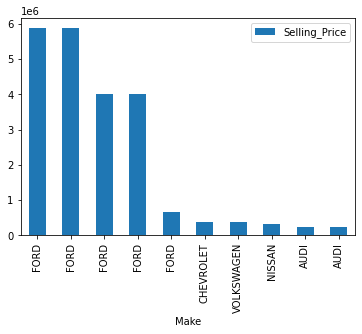

In [137]:
# reduced_df = car_df.head(10)
# df = pd.DataFrame({"Model", 'val':[10, 30, 20]})
ax = top_ten_selling.plot.bar(x='Make', y='Selling_Price', rot=90)

print("Ten makes with the highest selling prices in the data set")

In [134]:
top_ten_msrp

,MSRP,Selling_Price,Mileage,Cruise_Control,AutoReverseSystem,PedestrianAlertingSound,Axles,BasePrice,BedLengthIN,BedType,...,ForwardCollisionWarning,KeylessIgnition,Make,Model,ModelYear,PedAutoEBrake,TopSpeedMPH,TransmissionSpeeds,TransmissionStyle,VehicleType
37722,5877140,5877140,0,NaN,Standard,NaN,2.0,57240.0,NaN,NaN,...,NaN,Standard,FORD,Mustang,2018.0,NaN,NaN,NaN,NaN,PASSENGER CAR
38998,5877140,5877140,0,NaN,Standard,NaN,2.0,57240.0,NaN,NaN,...,NaN,Standard,FORD,Mustang,2018.0,NaN,NaN,NaN,NaN,PASSENGER CAR
78572,5301610,49051,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,GMC,Sierra,2019.0,NaN,NaN,NaN,NaN,TRUCK
145568,4002500,4001500,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,FORD,Transit,2020.0,NaN,NaN,NaN,NaN,TRUCK
146397,4002500,4001500,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,FORD,Transit,2020.0,NaN,NaN,NaN,NaN,TRUCK
86750,1127540,51877,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,FORD,F-150,2020.0,NaN,NaN,NaN,NaN,TRUCK
78823,999345,63511,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Standard,NaN,GMC,Sierra HD,2019.0,NaN,NaN,NaN,NaN,TRUCK
80888,999345,67011,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Standard,NaN,GMC,Sierra HD,2019.0,NaN,NaN,NaN,NaN,TRUCK
145121,742450,69921,0,NaN,Standard,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,FORD,F-350,2019.0,NaN,NaN,6.0,Automatic,TRUCK
145948,742450,69921,0,NaN,Standard,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,FORD,F-350,2019.0,NaN,NaN,6.0,Automatic,TRUCK


    Ten Highest MSRP by make in the data set


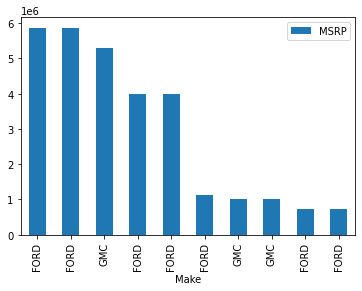

In [118]:
ax = top_ten_msrp.plot.bar(x='Make', y='MSRP', rot=90)
print("    Ten Highest MSRP by make in the data set")

In [108]:
Model_groupby = car_df.groupby(by=["Model"], dropna=False, as_index=False).mean().round(2)

#Model_groupby



## Scatter Plots

     MSRP vs Selling_Price on 230 unique car models


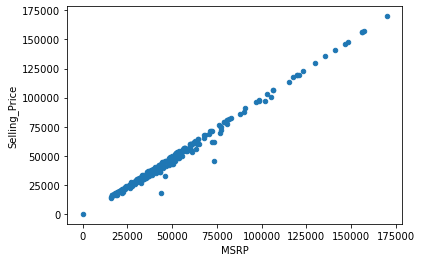

In [123]:
ax = Model_groupby.plot.scatter(x='MSRP', y='Selling_Price', rot=0)
print("     MSRP vs Selling_Price on 230 unique car models")

In [124]:
make_groupby = car_df.groupby(by=["Make"], dropna=False, as_index=False).mean().round(2)
#make_groupby

Average msrp vs selling price on 31 unique car makes found in data set


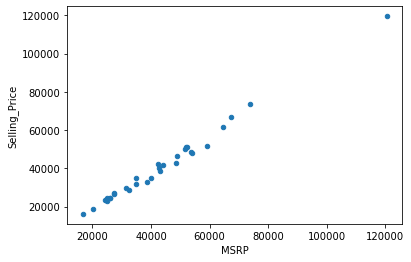

In [125]:
ax = make_groupby.plot.scatter(x='MSRP', y='Selling_Price', rot=0)
print("Average msrp vs selling price on 31 unique car makes found in data set")

In [127]:
MSRP_By_Model = Model_groupby["MSRP"].value_counts()
Selling_By_Model = Model_groupby["Selling_Price"].value_counts()
len(Selling_By_Model)

231

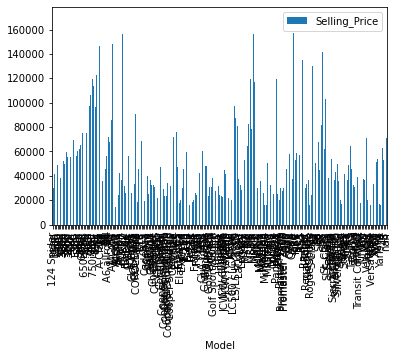

In [105]:
ax = Model_groupby.plot.bar(x='Model', y='Selling_Price', rot=90)